In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\ABC\Documents\IBM AI 6th sem\Neural Nets")

In [52]:
x_train = pd.read_csv("fashion_train.csv",header=0) # header=0 is written to make 1st row as the heading
x_test = pd.read_csv("fashion_test.csv",header=0)
y_train = pd.read_csv("fashion_train_labels.csv",header=0)
y_test = pd.read_csv("fashion_test_labels.csv",header=0)

In [53]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


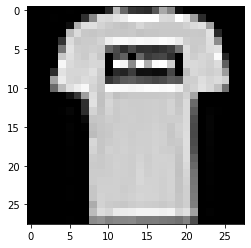

In [54]:
# Converting row values into 28 X 28 matrix
plt.imshow(np.array(x_train.loc[1]).reshape(28,28),cmap='gray')

In [55]:
# x Array 
x=np.array(x_train)

In [56]:
# Y Array
y_train.head()

,0
0,9
1,0
2,0
3,3
4,0


In [57]:
label_dic = {0:'T-Shirt/Top',1:'Trouser',2:'Pull-over',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle Boot'}

In [58]:
label_dic[0]

'T-Shirt/Top'

In [59]:
import keras
from keras.utils import to_categorical

In [60]:
y=to_categorical(y_train)

In [61]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
pd.DataFrame(y).head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation

In [64]:
# Defining model architecture

model=Sequential()

# Inpput layer
model.add(Dense(units=24,input_dim=784))
model.add(Activation('sigmoid'))

# Output layer
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [65]:
# Compiling the model, SGD = stocastic gradient descent, cost function = categorical_crossentropy
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
history=model.fit(x,y,epochs=30,validation_split=0.20,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 39us/step - loss: 1.2760 - accuracy: 0.7093 - val_loss: 1.2599 - val_accuracy: 0.7117
Epoch 2/30
48000/48000 [==============================] - 2s 38us/step - loss: 1.2300 - accuracy: 0.7121 - val_loss: 1.2073 - val_accuracy: 0.7156
Epoch 3/30
48000/48000 [==============================] - 2s 38us/step - loss: 1.1908 - accuracy: 0.7207 - val_loss: 1.1760 - val_accuracy: 0.7240
Epoch 4/30
48000/48000 [==============================] - 2s 38us/step - loss: 1.1616 - accuracy: 0.7225 - val_loss: 1.1504 - val_accuracy: 0.7254
Epoch 5/30
48000/48000 [==============================] - 2s 39us/step - loss: 1.1355 - accuracy: 0.7301 - val_loss: 1.1230 - val_accuracy: 0.7333
Epoch 6/30
48000/48000 [==============================] - 2s 38us/step - loss: 1.1081 - accuracy: 0.7373 - val_loss: 1.0996 - val_accuracy: 0.7292
Epoch 7/30
48000/48000 [==============================] - 2s 39us/st

In [67]:
p=model.predict_proba(np.array(x_test.loc[0]).reshape(1,784))

In [68]:
p.argmax()

9

In [69]:
label_dic[9]

'Ankle Boot'

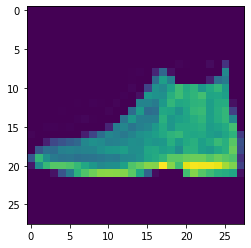

In [70]:
plt.imshow(np.array(x_test.loc[0]).reshape(28,28))

In [71]:
p1=model.predict_proba(np.array(x_test.loc[28]).reshape(1,784))

In [72]:
p1

array([[0.02890525, 0.01334102, 0.01726682, 0.07673711, 0.01739384,
        0.11979488, 0.01263254, 0.16830106, 0.02658885, 0.5190386 ]],
      dtype=float32)

In [73]:
p1.argmax()

9

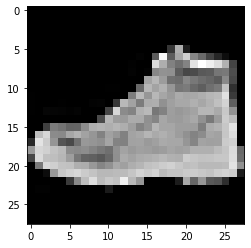

In [74]:
plt.imshow(np.array(x_test.loc[28]).reshape(28,28),cmap='gray')

In [77]:
p2=model.predict_proba(np.array(x_test.loc[32]).reshape(1,784))

In [79]:
p2.argmax()

3

In [81]:
label_dic[3]

'Dress'

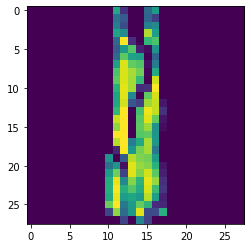

In [82]:
plt.imshow(np.array(x_test.loc[32]).reshape(28,28))